Task 8:


In [71]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [72]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
# drop the column which has most null values
data = data.drop(columns=['Cabin'],axis=1)

# drop of null or missing values
data.dropna(inplace=True)

In [75]:
# encode categorical variables
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

In [76]:
X = data[['Pclass','Sex','Age','Fare']]
y = data['Survived']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
start = time.time()

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)

total_time_rf = time.time()-start

In [79]:
print("Accuracy:    ", accuracy_score(y_test, y_pred_rf))
print("Precision:   ", precision_score(y_test, y_pred_rf))
print("Recall:      ", recall_score(y_test, y_pred_rf))

Accuracy:     0.7692307692307693
Precision:    0.7678571428571429
Recall:       0.6825396825396826


In [80]:
start = time.time()

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train,y_train)
y_pred_dt = clf_dt.predict(X_test)

total_time_dt = time.time()-start

In [81]:
print("Accuracy:    ", accuracy_score(y_test, y_pred_dt))
print("Precision:   ", precision_score(y_test, y_pred_dt))
print("Recall:      ", recall_score(y_test, y_pred_dt))

Accuracy:     0.6993006993006993
Precision:    0.6785714285714286
Recall:       0.6031746031746031


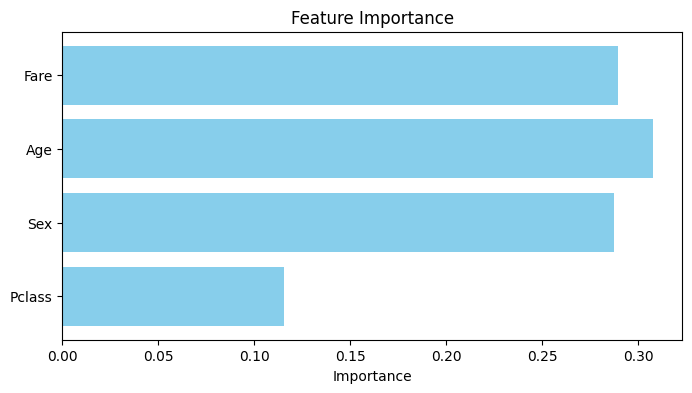

In [82]:
# Plotting feature importances
feature = X.columns
importances = clf_rf.feature_importances_

plt.figure(figsize=(8, 4))
plt.barh(feature, importances, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()


Task 9:

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score

In [84]:
# using previous dataset
# adaBoost classifier
start = time.time()

clf_ada = AdaBoostClassifier(random_state=42)
clf_ada.fit(X_train,y_train)
y_pred_ada = clf_ada.predict(X_test)

total_time_ada = time.time()-start

In [85]:
print("Accuracy:        ", accuracy_score(y_test, y_pred_ada))
print("F1-score:        ", f1_score(y_test, y_pred_ada))
print("Training time:    %.3fs" % total_time_ada)

Accuracy:         0.8181818181818182
F1-score:         0.7758620689655172
Training time:    0.108s


In [86]:
print("Accuracy:        ", accuracy_score(y_test, y_pred_rf))
print("F1-score:        ", f1_score(y_test, y_pred_rf))
print("Training time:    %.3fs" % total_time_rf)

Accuracy:         0.7692307692307693
F1-score:         0.7226890756302521
Training time:    0.162s


In [87]:
print("Accuracy:        ", accuracy_score(y_test, y_pred_dt))
print("F1-score:        ", f1_score(y_test, y_pred_dt))
print("Training time:    %.3fs" % total_time_dt)

Accuracy:         0.6993006993006993
F1-score:         0.6386554621848739
Training time:    0.005s


1--> Accuracy and fi-score of adaboost is better than random forest and decision tree classifiers.
2--> Training time of decision tree is faster than adaboost and randomforest.
